Description: This program detects breast cancer, based of data.
Guide: https://youtu.be/NSSOyhJBmWY

In [88]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [90]:
# How many patients do we have in the dataset?
df.shape

(569, 33)

We have 569 patients with 33 features.

In [ ]:
# How many NAN values have each feature/col?
df.isna().sum()

Unnamed: 32 has 569 NaN values: this column is useless.

Let's delete Unnamed: 32 column.

In [ ]:
# Drop Unnamed: 32 -> Drop columns which contain missing value
df = df.dropna(axis=1)
df.shape
df.isna().sum()

In [93]:
# How many features?
df.shape

(569, 32)

In [ ]:
# How many people have cancerous malignant cells? And benign?
df.diagnosis.value_counts()

There are 357 non-malignant (benign) and 212 malignant samples.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


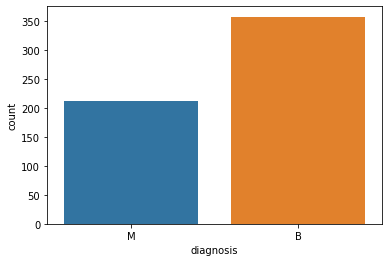

In [95]:
# Let's visualize the diagnosis
sns.countplot(df.diagnosis ,label="Count")

To analyse the data it is easier to have numeric values than strings, let's check the type of values features have.

In [ ]:
#Look at the data types 
df.dtypes

Except for the diagnosis column, the others store numerical values.

To fix this, the values for benign and malignant are coded as 0 and 1. Benign is coded as 0 and malignant as 1.

In [ ]:
# #Encoding categorical data values -> 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
df.iloc[:,1] = le_y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1].values

We are going to make a pair graph. This graph plots one variable against another with a dot plot.

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

In [ ]:
sns.pairplot(df.iloc[:,1:6])

In [ ]:
sns.pairplot(df.iloc[:,1:32], hue="diagnosis")

Blue -> 0 -> Benign non-cancerous cells
Orange -> 1 -> malignant cancerous 

In [ ]:
# Let's check the features
df.head(5)

In [ ]:
# Obtain correlation of the columns
df.corr()

In [ ]:
# Visualize the correlation with a Heatmap
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

The data have been prepared and analysed. The next step is to realise the model. For this we have two types of data, dependent (Y) and independent (X).

In [ ]:
# Diagnosis -> dependent (Y)
df.iloc[:, 1]

In [ ]:
# Some features -> independet (X)
df.iloc[:, 2:31]

In [22]:
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [23]:
# Now we separate the data into training data (75%) and test data (25%).
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# The data is then scaled. This is important as many algorithms are sensitive to data scaling. The data is going to be scaled so that it is all between the same values.
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html -> Standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()
sc.fit(X_train)
print(sc.mean_)

In [28]:
#	Fit to data, then transform it.
X_train = sc.fit_transform(X_train)
# Perform standardization by centering and scaling.
X_test = sc.transform(X_test)

Now the model is built. As a priori it is not known which model will work best, several models will be implemented and the accuracy of each one will be indicated.

Logistic regression -> Logistic regression is typically used when there is a dicotomous outcome variable (0/1) and a continuous predictor variable related to the probability of the outcome variable. It can also be used with multiple predictors or categorical predictors. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://idaejin.github.io/courses/R/2019/euskaltel/regresion-logistica.html

KNeighborsClassifier -> This algorithm predicts the solution based on the closest observations to the one that it is trying to predict. It is supervised and instance-based, meaning that it does not "learn" as a decision tree or logistic regression, but memorises the complete database. It works best with small datasets, otherwise it requires a lot of CPU.

https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/#:~:text=%C2%BFQu%C3%A9%20es%20el%20algoritmo%20k,de%20datos%20que%20le%20rodean.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier


SVC -> suport vector classification. The SVC is a reference algorithm in machine learning. It is mainly used for binomial systems, although it can also be used for multiple classification and regression problems.This classifier achieves good results when the separation line between classes is approximately linear. If it is not, its capacity drops drastically. One strategy to deal with scenarios where the group separation is non-linear is to expand the dimensions of the original space.

https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

GaussianNB -> Bayesian inference obtains a prediction of unknown variables based on the known variables. The variables are connected by a directed graph and the probability relationship between them is determined. The structure of the Bayesian model allows the relationship between the variables to be visualised by describing the probability distribution between them, specifying conditional independence calculations along with conditional probabilities.

https://www.urosario.edu.co/Administracion/documentos/investigacion/laboratorio/miller_2_3.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB

DecisionTreeClassifier -> Decision trees make decisions through nodes and their relationships. There are different types of nodes, initial nodes that perform the most important divisions, intermediate nodes that perform the divisions afterwards and final nodes that indicate the final division. It has some positive aspects since we do not need some assumptions such as linearity, normality, etc. It also works with different types of variables but tends to overfit, has problems with outlayers and the higher the complexity, the lower the interpretation.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


RandomForestClassifier -> Decision trees are good predictors with the data that they learn, but they tend to overfit. One method to improve the prediction is to use precision trees, so that the solution has to be generalized since no single tree has used the entire training dataset. 

https://www.iartificial.net/random-forest-bosque-aleatorio/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier


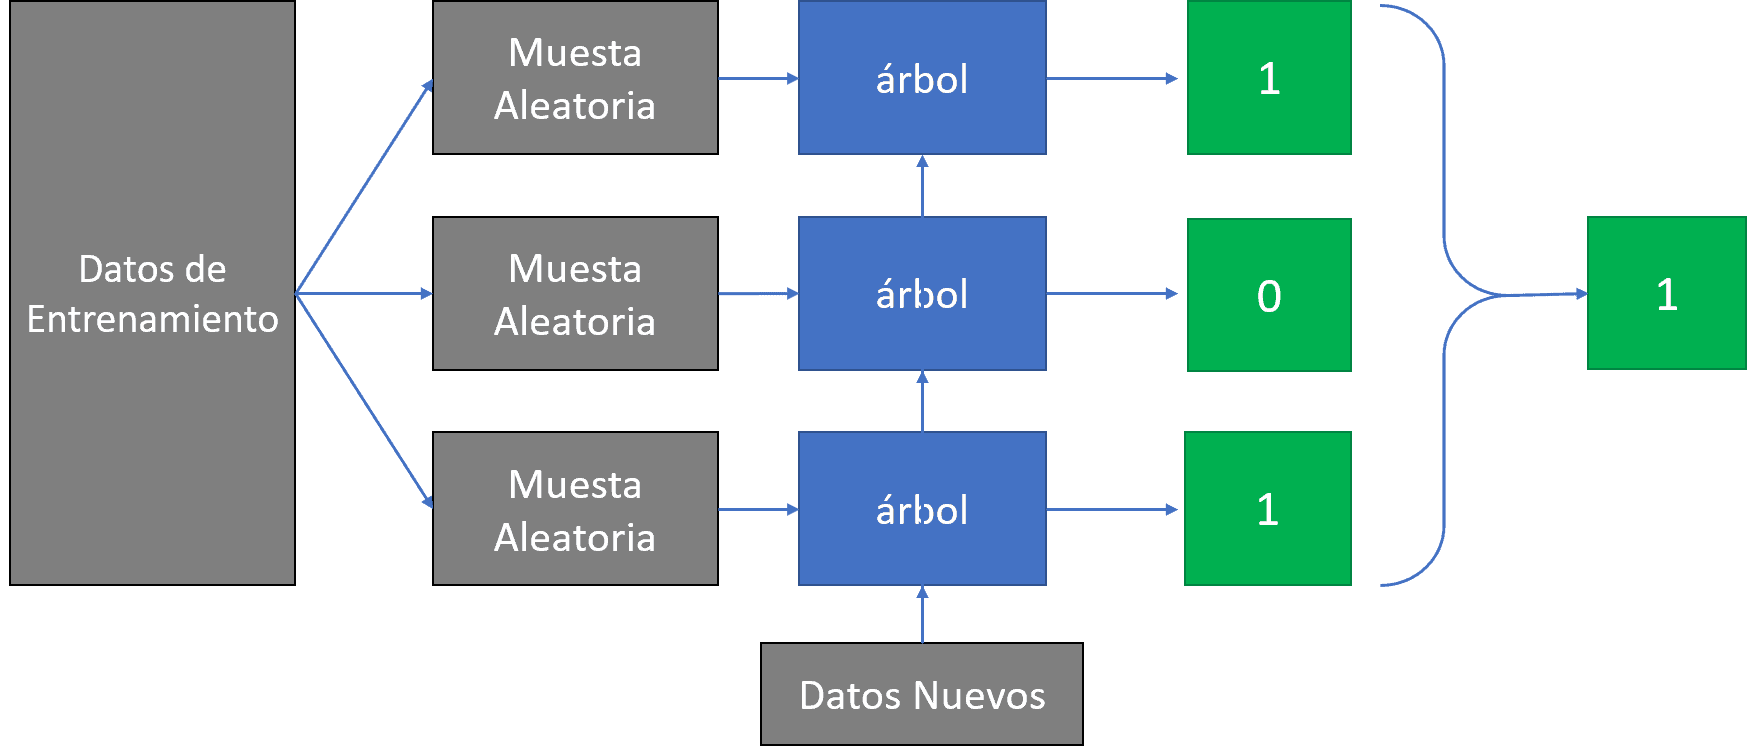

In [84]:
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy',max_depth = 25,oob_score = True, random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

We create the model with the data and check the accuracy score on the training data for each model to classify if a patient has cancer or not.

In [85]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9507042253521126
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


The results with the training data are as expected. Now it is necessary to check how many patients were misdiagnosed, both false positives and false negatives and those who were correctly diagnosed as positive and negative.

False Positive (FP) = A test result which incorrectly indicates that a particular condition or attribute is present.

True Positive (TP) = Sensitivity (also called the true positive rate, or probability of detection in some fields) measures the proportion of actual positives that are correctly identified as such.

True Negative (TN) = Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such.

False Negative (FN) = A test result that indicates that a condition does not hold, while in fact it does.

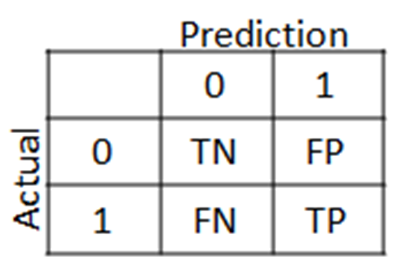

0 -> Logistic Regression

1 -> KNeighborsClassifier

2 -> SVC linear

3 -> SVC rbf

4 -> GaussianNB

5 -> DecisionTreeClassifier

6 -> RandomForestClassifier


In [86]:
# Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[86  4]
 [ 4 49]]
Model[0] Testing Accuracy = "0.9440559440559441!"

[[89  1]
 [ 5 48]]
Model[1] Testing Accuracy = "0.958041958041958!"

[[87  3]
 [ 2 51]]
Model[2] Testing Accuracy = "0.965034965034965!"

[[88  2]
 [ 3 50]]
Model[3] Testing Accuracy = "0.965034965034965!"

[[85  5]
 [ 6 47]]
Model[4] Testing Accuracy = "0.9230769230769231!"

[[84  6]
 [ 1 52]]
Model[5] Testing Accuracy = "0.951048951048951!"

[[88  2]
 [ 1 52]]
Model[6] Testing Accuracy = "0.9790209790209791!"



There is another way of looking at the model's accuracy.

In [87]:
from sklearn.metrics import classification_report
# Build a text report showing the main classification metrics.
from sklearn.metrics import accuracy_score
# Accuracy classification score.

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

From the accuracy and metrics above, the model that performed the best on the test data was the Random Forest Classifier with an accuracy score of about 97.9%. So I will choose that model to detect cancer cells in patients. 

In [ ]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

This model has misdiagnosed some cancer and non-cancer patients, it would be ideal to further refine the models to make the diagnosis 100% reliable.